# Python Leetcode challenge

## 19. Remove Nth Node From End of List (Medium) 20230307

Given the head of a linked list, remove the nth node from the end of the list and return its head.

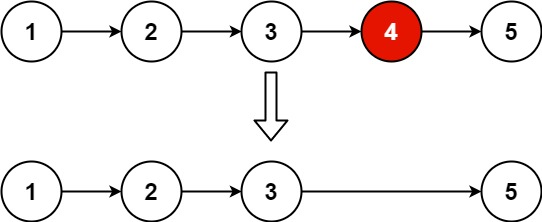

Input: head = [1,2,3,4,5], n = 2
Output: [1,2,3,5]

### Practice : create linked list object

In [33]:
class ListNode:
    def __init__(self,val = 0, link_next=None):
        self.val = val
        self.next = link_next

class LinkedList:
    def __init__(self,head=None,length=0):
        self.head = head
        self.length = length
    
    def push(self,value):
        New_node = ListNode(val = value)
        if self.head == None:
            self.head = New_node
        else:
            current_value = self.head
            while(current_value.next!=None):
                current_value = current_value.next
            current_value.next = New_node
        self.length +=1
    def print_all(self):
        current_value = self.head
        while(current_value.next!=None):
            print(current_value.val)
            current_value = current_value.next
        print(current_value.val)
        print("Total length is :"+str(self.length))

In [36]:
myLinkedList = LinkedList()
myLinkedList.push('Tim')
myLinkedList.push('Ken')
myLinkedList.push('Levit')
myLinkedList.print_all()

Tim
Ken
Levit
Total length is :3


### Method 1 (26 ms wins 97.50%, 13.9 MB wins 58.41%)

In [42]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def removeNthFromEnd(self, head, n):
        fast = head
        slow = head
        for i in range(n):
            fast = fast.next
            
        if not fast:
            return head.next
        
        while(fast.next != None):
            fast = fast.next
            slow = slow.next
        
        slow.next = slow.next.next
        
        return head

解該題之前需要先知曉 linked list 的資料結構，接這只需要利用基本的數學技巧即可，想法跟 poniter 有點類似，我們先讓一個 poniter 從第1項跑到第 n+1 項，接著再跑道最末項，假設 list 的長度為 m，則該 pointer 只需要再跑 m-n-1 步，同時讓另外一個 pointer 開始從第一項開始跑 m-n-1，集會跑到 m-n-1+1 項，而該項正好就是倒數第 n 項的前一項，接著只要取代第 m-n 項的 next 為 next.next 即可。

唯獨對 Python 不是很熟的讀者對於 return head 或許還不是很明白是什麼意思。

我們從 slow = head 來解釋，該行程式碼代表的是我們另外創建一個新的變數，且該變數<span style="font-weight:bold">指定的記憶體空間</span>跟 head 相同，而<span style="font-weight:bold;color:red">非重新創建一個新的記憶體空間</span>

意即當我們修改 slow.next 這個變數時，我們是直接對該變數指定的記憶體位置進行修改，因此 head 也會跟著修改，其實不能說 head 也跟著修改，更正確來說應該是 head 所對應到的位置跟 slow.next 所對應到的位置相同，因使該位置修改時，head 所對應到的位置也會修改。

請看下例: 

In [44]:
Node1 = ListNode("Tim")
Node1.next = ListNode("Jack")
Node1.next.next = ListNode('Jerry')

print("first item: " + Node1.val +"| second item: " + Node1.next.val + "| third item: " + Node1.next.next.val)

tmp_node = Node1
tmp_node.next.next = ListNode("Kevin")
print("first item: " + Node1.val +"| second item: " + Node1.next.val + "| third item: " + Node1.next.next.val)

first item: Tim| second item: Jack| third item: Jerry
first item: Tim| second item: Jack| third item: Kevin


上例可以完美呈現我們前面所解釋的內容，因為 tmp_node = Node1 表示 tmp_node 跟 Node1 這兩個變數指向同樣的記憶體空間，因此 tmp_node.next.next 和 Node1.next.next 也指向同樣的記憶體空間，因此當 tmp_node.next.next 改變時，Node1.next.next 也會跟著改變。